In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import nltk
import tweepy 
import json
import os
import re
from timeit import default_timer as timer
import arabic_reshaper
from bidi.algorithm import get_display

In [2]:
import tweepy

In [3]:
pd.set_option("display.max_colwidth", 200)

%matplotlib inline

# Gathering Data

In [13]:
consumer_key = 'xeVrGlU9K4R5KahmjWkLHQsEr'
consumer_secret = 'nTm7iKqj8rBM2mmwm7Yau9oKiPttSuWN7L6dtBh8LUWLHhwf1R'
access_token = '1401154602070855682-2d7Leu7dsbqCpilc1w4d4dBtpUYNBi'
access_secret = 'fX5Fv9Tu4RAFBB0kHM9FhM0ypWUveMvM9vQlqBtYpWDIi'

In [2]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True , wait_on_rate_limit_notify = True)

NameError: name 'consumer_key' is not defined

## Train data

In [7]:
train = pd.read_csv('train.csv')
train.head()

,id,hate
0,930224125087567872,0
1,930224110499762176,0
2,930223466661507072,1
3,930223457585061888,1
4,930223280266588162,1


In [8]:
train.shape

(5569, 2)

In [6]:
count = 0
start = timer()

# Fetch tweets from the twitter API using the following loop:
list_of_tweets = []
# Tweets that can't be found are saved in the list below:
cant_find_tweets_for_those_ids = []

for tweet_id in train.id.values:
    count += 1
    print(str(count) + ": " + str(tweet_id))
    try:
        list_of_tweets.append(api.get_status(tweet_id))
        print("Success")
    except Exception as e:
        cant_find_tweets_for_those_ids.append(tweet_id)
        print("Fail")
        
print('The number of tweets not found', len(cant_find_tweets_for_those_ids))

end = timer()
print(end - start)

1: 930224125087567872
Success
2: 930224110499762176
Success
3: 930223466661507072
Success
4: 930223457585061888
Fail
5: 930223280266588162
Fail
6: 930223178076639232
Success
7: 930222283817230336
Fail
8: 930222140665757696
Fail
9: 930221555627560960
Success
10: 930221314757013511
Fail
11: 930220978625445888
Success
12: 930218924515438592
Fail
13: 930218341742063617
Success
14: 930218151492640769
Fail
15: 930218016956125184
Success
16: 930217995007295488
Success
17: 930217275537412097
Fail
18: 930217234970169344
Fail
19: 930216947224141824
Success
20: 930216257923710976
Success
21: 930216011009273856
Success
22: 930215700920176641
Fail
23: 930214965323227137
Success
24: 930214686217392128
Fail
25: 930214490095923200
Fail
26: 930214318007832576
Fail
27: 930214315554168833
Success
28: 930214294624571393
Fail
29: 930214269794312194
Fail
30: 930214266820530178
Fail
31: 930213160388366336
Success
32: 930212840849444864
Success
33: 930212192028381186
Fail
34: 930211825794371584
Success
35: 93

Fail
274: 930141680304615425
Fail
275: 930141343548084225
Success
276: 930141207916838912
Fail
277: 930141065931362305
Fail
278: 930141048957030400
Success
279: 930140883323932672
Fail
280: 930140361002975232
Success
281: 930140219634081794
Success
282: 930140081901404162
Success
283: 930139937541840897
Fail
284: 930138925267603457
Success
285: 930138517870731265
Success
286: 930137890524483584
Fail
287: 930137529516544000
Fail
288: 930136969073561600
Success
289: 930136111032209410
Fail
290: 930136042539290629
Success
291: 930135943759237120
Fail
292: 930135253171294209
Fail
293: 930135237312548865
Fail
294: 930134895489318912
Success
295: 930134621106425859
Success
296: 930134079680507904
Success
297: 930134061452025856
Fail
298: 930133571142078464
Fail
299: 930133202269822977
Success
300: 930131934935703553
Fail
301: 930131605611581440
Fail
302: 930131504583331840
Fail
303: 930131223971803139
Fail
304: 930130926289465345
Success
305: 930130494808776704
Success
306: 93012979391965184

Success
544: 930080282878926848
Fail
545: 930080199361908736
Fail
546: 930079977516789760
Success
547: 930079641804603392
Fail
548: 930079408253054976
Success
549: 930079324044226561
Fail
550: 930079058565783552
Success
551: 930078938436694016
Fail
552: 930078873919938561
Fail
553: 930078678326923265
Success
554: 930078534114074625
Success
555: 930078384826339330
Success
556: 930076969911406592
Success
557: 930076743389544448
Success
558: 930076718420955136
Fail
559: 930076645775564800
Success
560: 930076285778481153
Fail
561: 930076100927074304
Fail
562: 930075525476995072
Success
563: 930075326545367040
Success
564: 930075053684862976
Success
565: 930074967911301120
Success
566: 930074304192176128
Success
567: 930073870865969152
Success
568: 930073514236932098
Success
569: 930072646833901568
Success
570: 930072615452135429
Fail
571: 930071611348324352
Success
572: 930071460613443584
Fail
573: 930071377901768704
Success
574: 930071306900590592
Success
575: 930071047008866304
Success
5

Success
812: 929975601498345472
Fail
813: 929975479779676160
Success
814: 929975248539275264
Success
815: 929974598589968384
Success
816: 929974073714790400
Fail
817: 929974051858255873
Success
818: 929973958748917760
Success
819: 929973742951788544
Fail
820: 929973403104235521
Fail
821: 929972528767959041
Success
822: 929970919304499200
Success
823: 929969275468763141
Success
824: 929968402109739008
Fail
825: 929968116364468224
Success
826: 929967668123328512
Success
827: 929967228505563136
Fail
828: 929965755763970049
Fail
829: 929965607805648897
Success
830: 929961983889338370
Fail
831: 929961815462891520
Fail
832: 929961539955822593
Fail
833: 929961385492205568
Success
834: 929960708288151552
Fail
835: 929960639124115456
Fail
836: 929960580575789057
Success
837: 929960551748382720
Fail
838: 929960456017580032
Success
839: 929960305660063744
Fail
840: 929959153283379200
Success
841: 929958424397402112
Fail
842: 929957691312574464
Success
843: 929957192517734400
Fail
844: 92995485826

Rate limit reached. Sleeping for: 57


Success
902: 929923345398816768
Success
903: 929923189270040576
Success
904: 929922648674586625
Fail
905: 929922190258163713
Success
906: 929921952931831808
Success
907: 929921826607763456
Success
908: 930565674681929728
Fail
909: 930565648605958145
Success
910: 930565508637843456
Success
911: 930564203890593792
Fail
912: 930562956215095296
Fail
913: 930560919670870019
Fail
914: 930560660139802624
Fail
915: 930559817432883202
Success
916: 930558738448158720
Fail
917: 930558452459622402
Fail
918: 930557983418875905
Success
919: 930557428541939712
Success
920: 930557277496594433
Success
921: 930556901338832896
Success
922: 930555411794726913
Success
923: 930554226064769024
Success
924: 930553391390085121
Fail
925: 930552890028158976
Success
926: 930548753399996417
Fail
927: 930546906215751680
Success
928: 930546491252445184
Fail
929: 930546296007610369
Fail
930: 930545993778651136
Fail
931: 930545249050681345
Fail
932: 930544081943650304
Success
933: 930544023080701952
Fail
934: 93054380

Success
1165: 930384152028905474
Fail
1166: 930383988610535424
Success
1167: 930383853109366784
Fail
1168: 930382536227868672
Fail
1169: 930381239055474688
Fail
1170: 930380430913753088
Success
1171: 930380079775080449
Fail
1172: 930380075245162497
Success
1173: 930378961317761024
Success
1174: 930378326476288000
Fail
1175: 930378209715212288
Success
1176: 930376074357194752
Success
1177: 930375282355326977
Fail
1178: 930375245537693696
Success
1179: 930374521378476032
Success
1180: 930373183202648064
Fail
1181: 930371356067352578
Fail
1182: 930371105214337024
Fail
1183: 930370104348610560
Success
1184: 930369874756538368
Success
1185: 930369660704493569
Fail
1186: 930369562578767872
Fail
1187: 930369470786424834
Fail
1188: 930365193082822656
Fail
1189: 930364275192946688
Success
1190: 930364071395852288
Fail
1191: 930362195304701952
Success
1192: 930361221043322880
Success
1193: 930360986795732992
Fail
1194: 930360724483969025
Fail
1195: 930360140058058752
Fail
1196: 93035992076303155

Fail
1425: 930066623955918849
Fail
1426: 930066521220636672
Fail
1427: 930065386300682240
Fail
1428: 930064808476577793
Success
1429: 930063886321102854
Fail
1430: 930063821938528256
Fail
1431: 930063806704902145
Fail
1432: 930062857361854464
Fail
1433: 930062255890337794
Fail
1434: 930061825357598720
Fail
1435: 930061775864762369
Success
1436: 930061440077135872
Fail
1437: 930060724336029696
Success
1438: 930059559993053184
Fail
1439: 930059352702103552
Fail
1440: 930059076268101632
Fail
1441: 930058395675234304
Success
1442: 930056859897253888
Success
1443: 930055310898880514
Success
1444: 930054775391113217
Success
1445: 930052534022090752
Success
1446: 930052345618141184
Success
1447: 930050628621086720
Success
1448: 930050588640993281
Fail
1449: 930050050755039232
Fail
1450: 930049954294452225
Success
1451: 930048247715987456
Success
1452: 930046894516178944
Success
1453: 930046776631013376
Success
1454: 930045978811555843
Success
1455: 930045637999153154
Success
1456: 93004251132

Success
1683: 929662305721372673
Fail
1684: 929662200456859648
Success
1685: 929661334781865989
Success
1686: 929661329836773376
Success
1687: 929661325348954112
Success
1688: 929661171782873088
Success
1689: 929656563752685568
Success
1690: 929656272579948546
Fail
1691: 929655962369249282
Success
1692: 929655400303157249
Success
1693: 929651259468115968
Fail
1694: 929651208184303617
Fail
1695: 929650397182152704
Success
1696: 929649686830571520
Fail
1697: 929648049332219904
Fail
1698: 929646597482401792
Success
1699: 929645983461453824
Success
1700: 929645579583361024
Fail
1701: 929645516392198144
Success
1702: 929644447473831936
Success
1703: 929644406335995904
Success
1704: 929638666867273730
Success
1705: 929636534311112705
Fail
1706: 929636483853619201
Success
1707: 929636217158864896
Fail
1708: 929634498811179008
Success
1709: 929634180895526912
Success
1710: 929633282983120901
Success
1711: 929633244018040832
Fail
1712: 929633145460281344
Success
1713: 929631918890635265
Fail
17

Rate limit reached. Sleeping for: 55


Success
1802: 929416378314121216
Fail
1803: 929415292643573761
Success
1804: 929415139438354432
Fail
1805: 929414230180319232
Success
1806: 929412812430041088
Success
1807: 929412351576674305
Success
1808: 929412068993839104
Success
1809: 929411691728732160
Success
1810: 929410726174879745
Success
1811: 929408859227246593
Fail
1812: 929408515801862145
Fail
1813: 929408397774086144
Success
1814: 929408366736302080
Success
1815: 929406451478679553
Success
1816: 929405409030496262
Fail
1817: 929404427903135744
Fail
1818: 929404105788919808
Success
1819: 929402092657233920
Success
1820: 929401080588496896
Success
1821: 929399911333945344
Fail
1822: 929398864553107458
Success
1823: 929395540810444800
Fail
1824: 929394958020370433
Success
1825: 929394505182273536
Success
1826: 929392780396449792
Success
1827: 929392568676339713
Success
1828: 929391375371718656
Fail
1829: 929387375125585920
Fail
1830: 929386733048860675
Fail
1831: 929386665940054017
Success
1832: 929384789731397632
Fail
1833:

Fail
2061: 930314217365934081
Fail
2062: 930314006396628992
Success
2063: 930313372448456704
Fail
2064: 930308009598779392
Fail
2065: 930305259016196097
Success
2066: 930302469279805440
Fail
2067: 930300952644595712
Success
2068: 930288099833384961
Success
2069: 930287101442248704
Success
2070: 930279562075926530
Fail
2071: 930276690407952384
Success
2072: 930276584803663872
Fail
2073: 930269343593754624
Success
2074: 930263299651919872
Success
2075: 930256645493534721
Success
2076: 930252470055469057
Fail
2077: 930243813184102400
Success
2078: 930241809124675584
Success
2079: 930241478030393349
Success
2080: 930240750905974785
Success
2081: 930238991705702401
Fail
2082: 930237994933637122
Fail
2083: 930236192473350144
Fail
2084: 930235530142453760
Fail
2085: 930234168939819008
Fail
2086: 930233007138623488
Fail
2087: 930231864857645057
Fail
2088: 930229272324829184
Success
2089: 930227201785593856
Success
2090: 930225674937356289
Fail
2091: 930225596642316288
Success
2092: 93022425955

Success
2319: 929880936568819713
Fail
2320: 929878675633340417
Success
2321: 929877708057858048
Success
2322: 929876675785035776
Success
2323: 929876575603933184
Fail
2324: 929875542924582912
Success
2325: 929874343705960454
Success
2326: 929858795211317248
Fail
2327: 929856013615976449
Success
2328: 929854738467782656
Success
2329: 929852814033129472
Success
2330: 929851486544244737
Success
2331: 929846213448486914
Fail
2332: 929845657610915840
Fail
2333: 929844180985221122
Success
2334: 929844110483185665
Success
2335: 929842104108507136
Fail
2336: 929841817599774721
Fail
2337: 929840996350943232
Success
2338: 929840896388030465
Success
2339: 929840470506614784
Fail
2340: 929839301025771520
Success
2341: 929839106577850368
Fail
2342: 929835035376672770
Success
2343: 929834694769864706
Fail
2344: 929834582974885889
Fail
2345: 929834058489753600
Success
2346: 929833331440660480
Success
2347: 929832321838182400
Fail
2348: 929832086655111174
Fail
2349: 929831845893722112
Success
2350: 92

Fail
2578: 929645192126320640
Success
2579: 929641495984050176
Success
2580: 929640437278826496
Fail
2581: 929640266344038403
Fail
2582: 929639585319215104
Success
2583: 929637719449497600
Success
2584: 929636890722127872
Success
2585: 929636860430897152
Success
2586: 929636624304046080
Success
2587: 929635745068912640
Fail
2588: 929635170520625153
Success
2589: 929633885037658112
Success
2590: 929632663677362176
Success
2591: 929631698312196096
Success
2592: 929630642652016640
Fail
2593: 929630316771373056
Fail
2594: 929627747349155840
Success
2595: 929627327910248448
Fail
2596: 929626129589207041
Success
2597: 929625152324800512
Fail
2598: 929624758689435648
Fail
2599: 929624640409960448
Fail
2600: 929620948822740992
Fail
2601: 929620815389380609
Success
2602: 929620632970686464
Success
2603: 929620626175864832
Success
2604: 929620570152501248
Fail
2605: 929620327877005312
Fail
2606: 929620320117575680
Fail
2607: 929620143440674816
Success
2608: 929619779626913793
Fail
2609: 92961362

Rate limit reached. Sleeping for: 90


Success
2702: 929445449412595712
Fail
2703: 929444652863950849
Fail
2704: 929444051178475521
Fail
2705: 929443811197177861
Fail
2706: 929443651264139264
Fail
2707: 929443423328788480
Fail
2708: 929442107416301568
Success
2709: 929441837332525056
Success
2710: 929441774531211264
Success
2711: 929440211825823745
Success
2712: 929439995571654657
Success
2713: 929436210233307137
Success
2714: 929434340450357248
Fail
2715: 929430176567627777
Fail
2716: 929427973446479872
Success
2717: 929427546118279168
Fail
2718: 929427322297573377
Success
2719: 929427093380722688
Success
2720: 929426891207069697
Fail
2721: 929426357729349633
Fail
2722: 929424743090049024
Success
2723: 929424342429167617
Fail
2724: 929420580629155840
Fail
2725: 929420096019292160
Success
2726: 929417834014355456
Fail
2727: 929417463149875200
Success
2728: 929411648791760897
Success
2729: 929411567615201280
Fail
2730: 929410361769459717
Success
2731: 929410264419639297
Success
2732: 929409264854224897
Fail
2733: 92940910025

Fail
2961: 930657808403582976
Success
2962: 930657721078206464
Success
2963: 930657651473690624
Success
2964: 930657606850531330
Success
2965: 930657423274205185
Success
2966: 930657398133534720
Success
2967: 930657377308864513
Success
2968: 930657341028098048
Success
2969: 930657324720631808
Fail
2970: 930657283289288705
Fail
2971: 930657265287385088
Success
2972: 930657243292471296
Success
2973: 930657222157307904
Success
2974: 930657172152864768
Success
2975: 930657163323854848
Success
2976: 930657062442369024
Success
2977: 930656974169165825
Fail
2978: 930656970792685568
Success
2979: 930656960831160320
Success
2980: 930656947828817920
Success
2981: 930656897014878208
Success
2982: 930656857731059712
Fail
2983: 930656839523545088
Success
2984: 930656802248822785
Success
2985: 930656744241618946
Fail
2986: 930656741741813761
Fail
2987: 930656737123815424
Success
2988: 930656725790789638
Success
2989: 930656639673360386
Fail
2990: 930656635302891520
Fail
2991: 930656615858130945
Succ

Success
3217: 930649829835001857
Fail
3218: 930649810784399360
Success
3219: 930649810763436033
Fail
3220: 930649684921724929
Fail
3221: 930649649941307394
Success
3222: 930649638692106240
Success
3223: 930649587714613248
Fail
3224: 930649585470574592
Fail
3225: 930649556664180736
Fail
3226: 930649508203114496
Fail
3227: 930649480487165952
Fail
3228: 930649467761676289
Fail
3229: 930649463558955008
Success
3230: 930649459611942912
Success
3231: 930649449831026688
Success
3232: 930649448191086592
Success
3233: 930649425109831683
Success
3234: 930649422282752000
Success
3235: 930649421121024001
Fail
3236: 930649395594432512
Fail
3237: 930649345057271809
Fail
3238: 930649337864048642
Success
3239: 930649279726841857
Success
3240: 930649237641138176
Success
3241: 930649230502453249
Fail
3242: 930649188643336192
Success
3243: 930649166484819968
Success
3244: 930649062285697025
Success
3245: 930649043277148160
Success
3246: 930648993679503360
Success
3247: 930648964327763969
Fail
3248: 93064

Fail
3474: 930641824368283650
Success
3475: 930641781858988032
Success
3476: 930641761583620096
Fail
3477: 930641735499296768
Success
3478: 930641703584878592
Success
3479: 930641673037721600
Success
3480: 930641608961294337
Fail
3481: 930641565885829120
Success
3482: 930641459170217984
Success
3483: 930641443244400640
Success
3484: 930641395542646784
Success
3485: 930641381089075200
Fail
3486: 930641363816808448
Success
3487: 930641363670093827
Fail
3488: 930641328979013632
Success
3489: 930641304794664961
Success
3490: 930641304656273408
Fail
3491: 930641297886494720
Success
3492: 930641280585158656
Success
3493: 930641277611364352
Success
3494: 930641277032566785
Fail
3495: 930641240571432960
Fail
3496: 930641228156276737
Success
3497: 930641221269278725
Success
3498: 930641217393741825
Success
3499: 930641207537135616
Fail
3500: 930641173743628290
Success
3501: 930641170908237830
Fail
3502: 930641140352798720
Success
3503: 930641124049543169
Fail
3504: 930641121432268802
Success
35

Rate limit reached. Sleeping for: 48


Success
3602: 930638451669684225
Success
3603: 930638445210370049
Fail
3604: 930638434905018368
Success
3605: 930638402382450689
Success
3606: 930638373705912320
Fail
3607: 930638370551803905
Success
3608: 930638318483705856
Success
3609: 930638292026036226
Success
3610: 930638289035563009
Fail
3611: 930638287605239809
Fail
3612: 930638263945220103
Success
3613: 930638243082723328
Success
3614: 930638238670360577
Success
3615: 930638197041848320
Success
3616: 930638196081352705
Success
3617: 930638157372121088
Success
3618: 930638081526558721
Fail
3619: 930638028942520322
Fail
3620: 930638026778271744
Fail
3621: 930638019387973632
Fail
3622: 930637985896333313
Success
3623: 930637980120829957
Fail
3624: 930637958377598978
Success
3625: 930637941231140864
Fail
3626: 930637920775569408
Success
3627: 930637904594063360
Success
3628: 930637889272270848
Fail
3629: 930637865163415552
Success
3630: 930637841662709760
Fail
3631: 930637824080171010
Fail
3632: 930637797781917702
Success
3633: 93

Success
3860: 930472534537056256
Fail
3861: 930471563274719232
Fail
3862: 930471110063226885
Success
3863: 930470902042591234
Fail
3864: 930470544662818817
Success
3865: 930470141497954304
Success
3866: 930469805852971014
Fail
3867: 930469631059513344
Success
3868: 930468561075744770
Success
3869: 930468283614101504
Success
3870: 930468180123938817
Fail
3871: 930468071273361408
Success
3872: 930467091517399041
Fail
3873: 930466893785333761
Fail
3874: 930466710116761600
Success
3875: 930466661962051585
Success
3876: 930465579743539201
Success
3877: 930465373123760128
Fail
3878: 930465181787983872
Success
3879: 930464766073729027
Success
3880: 930464660247269376
Fail
3881: 930463251862818817
Fail
3882: 930462957087150082
Fail
3883: 930462865324236803
Fail
3884: 930462559685275648
Fail
3885: 930462225344712704
Fail
3886: 930461719998140416
Success
3887: 930461192568692736
Success
3888: 930460804125773825
Fail
3889: 930459718111449089
Success
3890: 930457963030040577
Success
3891: 93045761

Fail
4120: 930327970862059520
Fail
4121: 930326931601575936
Success
4122: 930326696485687296
Fail
4123: 930326389634600961
Fail
4124: 930326196621070336
Success
4125: 930325003786248192
Success
4126: 930324197066395648
Success
4127: 930324068607328256
Fail
4128: 930323583183806465
Success
4129: 930323108044648448
Fail
4130: 930323038939373568
Fail
4131: 930322857414053888
Fail
4132: 930321975079329794
Fail
4133: 930321496546922496
Fail
4134: 930321431925350400
Success
4135: 930320794353373185
Fail
4136: 930319176866172929
Success
4137: 930317801549631488
Fail
4138: 930317704245972992
Success
4139: 930317319255019520
Success
4140: 930316566893334528
Fail
4141: 930316264400146433
Success
4142: 930316224919212032
Fail
4143: 930316025702346752
Fail
4144: 930312378398453760
Success
4145: 930311961014947840
Fail
4146: 930311939879854080
Success
4147: 930310483101577216
Success
4148: 930310049410568193
Success
4149: 930309574086754304
Success
4150: 930308900162859008
Success
4151: 93030825009

Success
4380: 930140488404959239
Success
4381: 930139099922563080
Fail
4382: 930138594265718784
Success
4383: 930138472047890432
Success
4384: 930138458949144583
Success
4385: 930137977740595200
Success
4386: 930137587603394561
Success
4387: 930137575817441280
Success
4388: 930136943626735617
Success
4389: 930136936945242115
Fail
4390: 930136765209432064
Fail
4391: 930136688793456640
Fail
4392: 930136617469259776
Fail
4393: 930135944333791232
Success
4394: 930135708756578304
Success
4395: 930135569597915137
Fail
4396: 930135271961780224
Fail
4397: 930134802950443009
Fail
4398: 930134603133841408
Success
4399: 930134414818004993
Fail
4400: 930133315339931648
Fail
4401: 930132226154561539
Success
4402: 930132076258570241
Success
4403: 930132015550214144
Success
4404: 930130249387577345
Success
4405: 930130122086277120
Success
4406: 930129061321560064
Success
4407: 930128533552357376
Fail
4408: 930128152554299393
Success
4409: 930128068101976066
Success
4410: 930127013955829760
Success
44

Success
4639: 930571530349826053
Success
4640: 930570045704548362
Success
4641: 930567517340397568
Fail
4642: 930566988178456576
Fail
4643: 930566546241581061
Success
4644: 930560839416938496
Success
4645: 930560611703910400
Fail
4646: 930559675980009472
Fail
4647: 930559259384872960
Success
4648: 930557723976101889
Fail
4649: 930556901338832896
Success
4650: 930556833336643584
Success
4651: 930555954847813632
Success
4652: 930555599909281797
Success
4653: 930550630896324611
Success
4654: 930545312762073088
Fail
4655: 930544989419069447
Success
4656: 930543804121202688
Success
4657: 930543120823078912
Fail
4658: 930543031975010304
Fail
4659: 930542356742451200
Success
4660: 930539770131857408
Fail
4661: 930537559062663168
Fail
4662: 930536972233428992
Success
4663: 930536747116544000
Success
4664: 930536150237896704
Success
4665: 930536070806163457
Success
4666: 930533646834036736
Success
4667: 930533478009114624
Success
4668: 930532310138617862
Success
4669: 930531174031687681
Success

Fail
4897: 930274304167698432
Success
4898: 930271191201435648
Success
4899: 930270857351622657
Success
4900: 930270625285005312
Fail
4901: 930269095584464896
Fail
4902: 930264778169298944
Success
4903: 930255257682227201
Success
4904: 930250358470991877
Fail
4905: 930248625304858629
Fail
4906: 930245381367255041
Fail
4907: 930238704844771328
Success
4908: 930233877393739776
Success
4909: 930233007138623488
Fail
4910: 930228634648006656
Fail
4911: 930223567379234816
Fail
4912: 930222786269843456
Fail
4913: 930221905008889856
Fail
4914: 930221726436380673
Success
4915: 930217635488428034
Fail
4916: 930212808251379714
Success
4917: 930210718900674560
Fail
4918: 930209856564420608
Fail
4919: 930207743323115520
Fail
4920: 930207455388323847
Fail
4921: 930206459421511680
Fail
4922: 930205957006782469
Fail
4923: 930205814496858113
Success
4924: 930205774084755456
Fail
4925: 930202722132987904
Success
4926: 930201471525818370
Success
4927: 930200223644880897
Success
4928: 930199312008704001
S

Fail
5155: 930000977448591360
Success
5156: 929996367963066368
Success
5157: 929995558915395584
Fail
5158: 929994460699734016
Fail
5159: 929992595635351552
Success
5160: 929992378877964288
Fail
5161: 929991751275810816
Success
5162: 929991389194178560
Success
5163: 929991138857111552
Success
5164: 929990519605915648
Success
5165: 929988139128623104
Success
5166: 929986644639436800
Success
5167: 929983753874825216
Fail
5168: 929983624572698624
Fail
5169: 929983533770248193
Success
5170: 929982644804349952
Success
5171: 929982080448155648
Success
5172: 929981482529099777
Success
5173: 929980723309809664
Fail
5174: 929980139789791232
Success
5175: 929978433257525250
Fail
5176: 929977291215695872
Success
5177: 929976193394372608
Success
5178: 929974178454822912
Success
5179: 929972352129163265
Success
5180: 929970998820122624
Success
5181: 929970073816707072
Success
5182: 929968866750373889
Fail
5183: 929968030779658242
Success
5184: 929967132804345856
Fail
5185: 929965928187596800
Success

Fail
5413: 929792035913056256
Fail
5414: 929791968766443520
Success
5415: 929791752826998787
Success
5416: 929791496391237632
Success
5417: 929791410722693120
Fail
5418: 929790369067347968
Fail
5419: 929788449393082368
Success
5420: 929788248993550336
Success
5421: 929787969682264064
Success
5422: 929786730596716544
Fail
5423: 929786722229112839
Success
5424: 929786652569903104
Fail
5425: 929786624489279488
Success
5426: 929786596265807872
Fail
5427: 929786178945060866
Success
5428: 929785928947822594
Success
5429: 929785614387556354
Success
5430: 929785137985916931
Success
5431: 929785020990058497
Fail
5432: 929784844892164097
Fail
5433: 929784791548833792
Success
5434: 929784638146600961
Success
5435: 929784606215299073
Success
5436: 929784605825294336
Success
5437: 929784585717800960
Success
5438: 929784369786638336
Fail
5439: 929784192099119104
Success
5440: 929784083366010880
Success
5441: 929783995071688704
Success
5442: 929783921386180608
Success
5443: 929783617148080129
Success

In [8]:
#Then in this code block we isolate the json part of each tweepy status object that we have downloaded 
#and we add them all into a list.

my_list_of_dicts = []
for each_json_tweet in list_of_tweets:
    my_list_of_dicts.append(each_json_tweet._json)

NameError: name 'list_of_tweets' is not defined

In [7]:
#we write this list into a txt file

with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(my_list_of_dicts, indent=4))

NameError: name 'my_list_of_dicts' is not defined

In [7]:
#Now we are going to create a DataFrame from the tweet_json.txt file

my_demo_list = []
with open('tweet_json.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        tweet = each_dictionary['text']
        

        my_demo_list.append({'tweet_id': int(tweet_id),
                             'tweet': str(tweet),
                            })
        tweet_json = pd.DataFrame(my_demo_list, columns = ['tweet_id', 'tweet'])

In [8]:
tweet_json.head()

,tweet_id,tweet
0,930224125087567872,مؤسسة أرشيف المغرب تتسلم وثائق عن ذاكرة اليهود المغاربة https://t.co/VoTi6m2wrv https://t.co/ZFNQmdQQXW
1,930224110499762176,مفتي السعودية حماس إرهابية وقتال اليهود حرام شرعا، ووزير صهيوني: والله عنا إستحوا يفتوا مثلك، يعيشك… https://t.co/QV1ZAJFc6I
2,930223466661507072,أمراء ال سعود اليهود يخوضون حربا عن الصهيونيه
3,930223178076639232,تحميل كتاب مقارنة الأديان: اليهودية تأليف أحمد شلبي pdf مجاناً | المكتبة الإسلامية | موقع بوكس ستريم https://t.co/VaTb2twhm2
4,930221555627560960,#هزه_ارضيه_في_جده\n\nهذه هيه الهزه الحقيقيه وتخافون من الهزه وماتخافون من الهزه الذي بي اعملها نظامكم الهمجي يا… https://t.co/pp1n1IPl8I


In [9]:
df = pd.merge(tweet_json, train, left_on='tweet_id', right_on='id')
train_df.drop(['id'], axis = 1, inplace = True)

In [38]:
train_df.shape

(3359, 2)

## Test data

In [9]:
test = pd.read_csv('test.csv')
test.head()

,id,hate
0,958409085082390528,1
1,958409082624512000,1
2,958408398420156416,0
3,958408217167527936,1
4,958407891798642688,1


In [10]:
test.shape

(567, 2)

In [15]:
count = 0
start = timer()

# Fetch tweets from the twitter API using the following loop:
list_of_tweets = []
# Tweets that can't be found are saved in the list below:
cant_find_tweets_for_those_ids = []

for tweet_id in test.id.values:
    count += 1
    print(str(count) + ": " + str(tweet_id))
    try:
        list_of_tweets.append(api.get_status(tweet_id))
        print("Success")
    except Exception as e:
        cant_find_tweets_for_those_ids.append(tweet_id)
        print("Fail")
        
print('The number of tweets not found', len(cant_find_tweets_for_those_ids))

end = timer()
print(end - start)

1: 958409085082390528
Fail
2: 958409082624512000
Fail
3: 958408398420156416
Fail
4: 958408217167527936
Fail
5: 958407891798642688
Success
6: 958407793324806147
Fail
7: 958407520527306754
Success
8: 958406932297109510
Fail
9: 958406760561291265
Success
10: 958406758770278400
Fail
11: 958406620576407552
Success
12: 958406508072656896
Success
13: 958406364455407621
Fail
14: 958406350526173185
Fail
15: 958406290702766085
Success
16: 958406279994724352
Success
17: 958406263200800768
Fail
18: 958406227113005056
Success
19: 958405913043488769
Success
20: 958405546666840064
Success
21: 958405454639583233
Success
22: 958405394841219072
Fail
23: 958405354764865536
Success
24: 958405213240651776
Success
25: 958405143699054592
Success
26: 958404988233027584
Success
27: 958404883983499264
Fail
28: 958404854115954688
Success
29: 958404716630806528
Success
30: 958404536842051585
Success
31: 958404355450920960
Success
32: 958404264581353472
Success
33: 958404222466306048
Success
34: 958404105277452294

Success
272: 958266854556028928
Fail
273: 958266616445325313
Fail
274: 958263944581451776
Fail
275: 958263660148940801
Success
276: 958260664686006273
Success
277: 958259026764189696
Success
278: 958252236722851840
Success
279: 958250414822035456
Success
280: 958248806121918465
Fail
281: 958413868258209794
Fail
282: 958413857592094721
Success
283: 958413848586973186
Fail
284: 958413832484999169
Success
285: 958413792030928896
Fail
286: 958413779594772483
Success
287: 958413705414430724
Fail
288: 958413684963008512
Fail
289: 958413678478577664
Success
290: 958413674288418816
Success
291: 958413646702538752
Success
292: 958413532030275585
Fail
293: 958413521947123712
Fail
294: 958413397971828736
Fail
295: 958413377126223873
Success
296: 958413371291979778
Fail
297: 958413338056318976
Success
298: 958413310071844864
Success
299: 958413307047809024
Fail
300: 958413304908668936
Success
301: 958413263993229314
Success
302: 958413263187955714
Fail
303: 958413262990823426
Success
304: 95841321

Success
542: 958356509095792640
Success
543: 958355784466825216
Success
544: 958354067771789312
Fail
545: 958352929240637440
Success
546: 958352719860953093
Fail
547: 958352627837915137
Fail
548: 958352242217766919
Fail
549: 958351860859064320
Success
550: 958350756465258496
Success
551: 958350509529681920
Fail
552: 958350357897404422
Fail
553: 958349836759322624
Fail
554: 958348407474720768
Success
555: 958347318436270080
Fail
556: 958344626783453184
Fail
557: 958344044056367104
Success
558: 958343876640722944
Fail
559: 958343650425044993
Fail
560: 958343457214550016
Success
561: 958342796414304256
Fail
562: 958342533419061248
Fail
563: 958342083311435777
Fail
564: 958341695892017154
Success
565: 958341568469094400
Fail
566: 958339664036945922
Success
567: 958339586173865984
Success
The number of tweets not found 277
276.11086809999995


In [16]:
#Then in this code block we isolate the json part of each tweepy status object that we have downloaded 
#and we add them all into a list.

my_list_of_dicts = []
for each_json_tweet in list_of_tweets:
    my_list_of_dicts.append(each_json_tweet._json)

In [17]:
#we write this list into a txt file

with open('test_json.txt', 'w') as file:
        file.write(json.dumps(my_list_of_dicts, indent=4))

In [18]:
#Now we are going to create a DataFrame from the test_json.txt file

my_demo_list = []
with open('test_json.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        tweet = each_dictionary['text']
        

        my_demo_list.append({'tweet_id': int(tweet_id),
                             'tweet': str(tweet),
                            })
        test_json = pd.DataFrame(my_demo_list, columns = ['tweet_id', 'tweet'])

In [19]:
test_df = pd.merge(test_json, test, left_on='tweet_id', right_on='id')
test_df.drop(['id'], axis = 1, inplace = True)

In [37]:
test_df.shape

(308, 2)

# Adding another dataset

In [39]:
df3 = pd.read_csv('dataset3.csv')

In [40]:
df3.head()

,tweet,hate
0,@E: يا رب يا واحد يا أحد بحق يوم الاحد ان تهلك بني سعود المجرمين. لاجل اطفال اليمن شاركوا.,1
1,@E @E @E @E @E يا لبناني يا فضلات الاستعمار الفرنسي اللبنانيين بالخليج يشغلون نسوانهم عاهرات,1
2,@E عليك لعنه الله يا فتنه الفتنه اشد من القتل انت محرض من النوع الاخوانجي سلمان الحزم سلمان الانسانيه سلمان من دمر كم يا اخوانجي يا شيعي يا ابن موزه عاش سلمان الحزم عاش عاش ملك العرب,1
3,"@E @E أولا يا إبن الشرموطة السعودية , ليش تتكلم مصري , يمكن أمك ناكها حارس العمارة المصري جنبكم مسكينة مبس داعس على وجوهكم يا كلاب يا بدو يا معفنين تبي فلوس على تأكلكم من عرق طيزها ههههههه, والله ...",1
4,@E شكلك فرحان يا عبدالرحمن يا اخي انت يهودي و لا ايش ملتك مستحيل تكون مسلم,1


In [41]:
df3.shape

(394, 2)

# joining datasets:

In [42]:
train_df.drop(['tweet_id'], axis = 1, inplace = True)
test_df.drop(['tweet_id'], axis = 1, inplace = True)

KeyError: "['tweet_id'] not found in axis"

In [43]:
datasets = [train_df, test_df, df3]

df = pd.concat(datasets)

df.shape

(4061, 2)

In [44]:
df

,tweet,hate
0,مؤسسة أرشيف المغرب تتسلم وثائق عن ذاكرة اليهود المغاربة https://t.co/VoTi6m2wrv https://t.co/ZFNQmdQQXW,0
1,مفتي السعودية حماس إرهابية وقتال اليهود حرام شرعا، ووزير صهيوني: والله عنا إستحوا يفتوا مثلك، يعيشك… https://t.co/QV1ZAJFc6I,0
2,أمراء ال سعود اليهود يخوضون حربا عن الصهيونيه,1
3,تحميل كتاب مقارنة الأديان: اليهودية تأليف أحمد شلبي pdf مجاناً | المكتبة الإسلامية | موقع بوكس ستريم https://t.co/VaTb2twhm2,0
4,#هزه_ارضيه_في_جده\n\nهذه هيه الهزه الحقيقيه وتخافون من الهزه وماتخافون من الهزه الذي بي اعملها نظامكم الهمجي يا… https://t.co/pp1n1IPl8I,1
...,...,...
389,#طرابلس #ليبيا #السعودية <>على الباغي تدور الدوائر يا آل سعود يا أعداء الحرية ..,1
390,@E: يا خالد السعودي يا ابن الشرموطه دلال يلي من بلاد الدب الداشر ابو منشار المجرم الإرهابي يا خادم وعبد الشراميط والعاهرات المعف…,1
391,@E: @E @E امشي يا كلب العسكر يا خنزير يا عتلو .. يسقط يسقط حكم العسكر ويسقط كل كلاب العسكر.,1
392,دول عالم جبلات ما بيحسوش عشان صعدو عاملين مولد ويقولو افريقيا للرجال ..ودا من امتى يا زيزى يا حصاله افريقيا,1


In [45]:
df.to_csv('tweet.csv', index=False)

# Preprocessing

In [4]:
df = pd.read_csv('tweet - tweet.csv')
df.head()

,tweet,hate
0,مؤسسة أرشيف المغرب تتسلم وثائق عن ذاكرة اليهود المغاربة https://t.co/VoTi6m2wrv https://t.co/ZFNQmdQQXW,0
1,مفتي السعودية حماس إرهابية وقتال اليهود حرام شرعا، ووزير صهيوني: والله عنا إستحوا يفتوا مثلك، يعيشك… https://t.co/QV1ZAJFc6I,0
2,أمراء ال سعود اليهود يخوضون حربا عن الصهيونيه,1
3,تحميل كتاب مقارنة الأديان: اليهودية تأليف أحمد شلبي pdf مجاناً | المكتبة الاسلامية | موقع بوكس ستريم https://t.co/VaTb2twhm2,0
4,#هزه_ارضيه_في_جده\n\nهذه هيه الهزه الحقيقيه وتخافون من الهزه وماتخافون من الهزه الذي بي اعملها نظامكم الهمجي يا… https://t.co/pp1n1IPl8I,1


In [5]:
df.drop_duplicates(inplace = True, ignore_index=True)
df.shape

(3718, 2)

In [6]:
df['hashtags'] = df['tweet'].str.findall(r'#.*?(?=\s|$)')
df['hashtags'] = df['hashtags'].apply(lambda x: [item for item in x if item != '#'])
hashtags = df['hashtags'].tolist()
hashtags = sum(hashtags, [])

In [7]:
my_punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•'
    
def preprocess(text_string):
    space_pattern = '\s+'
    new_line = '\n+'
    giant_url_regex = ('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
        '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    mention_regex = '@[\w\-]+'
    non_word_char = '[^\w]'
    
    parsed_text = re.sub(space_pattern, ' ', text_string)
    parsed_text = re.sub(new_line, ' ', parsed_text)
    parsed_text = re.sub(giant_url_regex, '', parsed_text)
    parsed_text = re.sub(mention_regex, '', parsed_text)
    parsed_text = re.sub(non_word_char, ' ', parsed_text)
    parsed_text = re.sub(r"\bو(.*?)\b", r'\1', parsed_text)
    parsed_text = re.sub('([0-9]+)', '', parsed_text)
    
    return parsed_text

In [8]:
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

In [9]:
df['tidy_tweet'] = np.vectorize(preprocess)(df['tweet'])
df.head()

,tweet,hate,hashtags,tidy_tweet
0,مؤسسة أرشيف المغرب تتسلم وثائق عن ذاكرة اليهود المغاربة https://t.co/VoTi6m2wrv https://t.co/ZFNQmdQQXW,0,[],مؤسسة أرشيف المغرب تتسلم ثائق عن ذاكرة اليهود المغاربة
1,مفتي السعودية حماس إرهابية وقتال اليهود حرام شرعا، ووزير صهيوني: والله عنا إستحوا يفتوا مثلك، يعيشك… https://t.co/QV1ZAJFc6I,0,[],مفتي السعودية حماس إرهابية قتال اليهود حرام شرعا وزير صهيوني الله عنا إستحوا يفتوا مثلك يعيشك
2,أمراء ال سعود اليهود يخوضون حربا عن الصهيونيه,1,[],أمراء ال سعود اليهود يخوضون حربا عن الصهيونيه
3,تحميل كتاب مقارنة الأديان: اليهودية تأليف أحمد شلبي pdf مجاناً | المكتبة الاسلامية | موقع بوكس ستريم https://t.co/VaTb2twhm2,0,[],تحميل كتاب مقارنة الأديان اليهودية تأليف أحمد شلبي pdf مجانا المكتبة الاسلامية موقع بوكس ستريم
4,#هزه_ارضيه_في_جده\n\nهذه هيه الهزه الحقيقيه وتخافون من الهزه وماتخافون من الهزه الذي بي اعملها نظامكم الهمجي يا… https://t.co/pp1n1IPl8I,1,[#هزه_ارضيه_في_جده],هزه_ارضيه_في_جده هذه هيه الهزه الحقيقيه تخافون من الهزه ماتخافون من الهزه الذي بي اعملها نظامكم الهمجي يا


In [10]:
df['tidy_tweet'] = np.vectorize(deEmojify)(df['tidy_tweet'])
df.head()

,tweet,hate,hashtags,tidy_tweet
0,مؤسسة أرشيف المغرب تتسلم وثائق عن ذاكرة اليهود المغاربة https://t.co/VoTi6m2wrv https://t.co/ZFNQmdQQXW,0,[],مؤسسة أرشيف المغرب تتسلم ثائق عن ذاكرة اليهود المغاربة
1,مفتي السعودية حماس إرهابية وقتال اليهود حرام شرعا، ووزير صهيوني: والله عنا إستحوا يفتوا مثلك، يعيشك… https://t.co/QV1ZAJFc6I,0,[],مفتي السعودية حماس إرهابية قتال اليهود حرام شرعا وزير صهيوني الله عنا إستحوا يفتوا مثلك يعيشك
2,أمراء ال سعود اليهود يخوضون حربا عن الصهيونيه,1,[],أمراء ال سعود اليهود يخوضون حربا عن الصهيونيه
3,تحميل كتاب مقارنة الأديان: اليهودية تأليف أحمد شلبي pdf مجاناً | المكتبة الاسلامية | موقع بوكس ستريم https://t.co/VaTb2twhm2,0,[],تحميل كتاب مقارنة الأديان اليهودية تأليف أحمد شلبي pdf مجانا المكتبة الاسلامية موقع بوكس ستريم
4,#هزه_ارضيه_في_جده\n\nهذه هيه الهزه الحقيقيه وتخافون من الهزه وماتخافون من الهزه الذي بي اعملها نظامكم الهمجي يا… https://t.co/pp1n1IPl8I,1,[#هزه_ارضيه_في_جده],هزه_ارضيه_في_جده هذه هيه الهزه الحقيقيه تخافون من الهزه ماتخافون من الهزه الذي بي اعملها نظامكم الهمجي يا


In [11]:
df['tidy_tweet'] = df['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))
df.head()

,tweet,hate,hashtags,tidy_tweet
0,مؤسسة أرشيف المغرب تتسلم وثائق عن ذاكرة اليهود المغاربة https://t.co/VoTi6m2wrv https://t.co/ZFNQmdQQXW,0,[],مؤسسة أرشيف المغرب تتسلم ثائق عن ذاكرة اليهود المغاربة
1,مفتي السعودية حماس إرهابية وقتال اليهود حرام شرعا، ووزير صهيوني: والله عنا إستحوا يفتوا مثلك، يعيشك… https://t.co/QV1ZAJFc6I,0,[],مفتي السعودية حماس إرهابية قتال اليهود حرام شرعا وزير صهيوني الله عنا إستحوا يفتوا مثلك يعيشك
2,أمراء ال سعود اليهود يخوضون حربا عن الصهيونيه,1,[],أمراء ال سعود اليهود يخوضون حربا عن الصهيونيه
3,تحميل كتاب مقارنة الأديان: اليهودية تأليف أحمد شلبي pdf مجاناً | المكتبة الاسلامية | موقع بوكس ستريم https://t.co/VaTb2twhm2,0,[],تحميل كتاب مقارنة الأديان اليهودية تأليف أحمد شلبي pdf مجانا المكتبة الاسلامية موقع بوكس ستريم
4,#هزه_ارضيه_في_جده\n\nهذه هيه الهزه الحقيقيه وتخافون من الهزه وماتخافون من الهزه الذي بي اعملها نظامكم الهمجي يا… https://t.co/pp1n1IPl8I,1,[#هزه_ارضيه_في_جده],هزه_ارضيه_في_جده هذه هيه الهزه الحقيقيه تخافون من الهزه ماتخافون من الهزه الذي بي اعملها نظامكم الهمجي يا


In [12]:
df['tidy_tweet'] = df['tidy_tweet'].str.strip()
df.head()

,tweet,hate,hashtags,tidy_tweet
0,مؤسسة أرشيف المغرب تتسلم وثائق عن ذاكرة اليهود المغاربة https://t.co/VoTi6m2wrv https://t.co/ZFNQmdQQXW,0,[],مؤسسة أرشيف المغرب تتسلم ثائق عن ذاكرة اليهود المغاربة
1,مفتي السعودية حماس إرهابية وقتال اليهود حرام شرعا، ووزير صهيوني: والله عنا إستحوا يفتوا مثلك، يعيشك… https://t.co/QV1ZAJFc6I,0,[],مفتي السعودية حماس إرهابية قتال اليهود حرام شرعا وزير صهيوني الله عنا إستحوا يفتوا مثلك يعيشك
2,أمراء ال سعود اليهود يخوضون حربا عن الصهيونيه,1,[],أمراء ال سعود اليهود يخوضون حربا عن الصهيونيه
3,تحميل كتاب مقارنة الأديان: اليهودية تأليف أحمد شلبي pdf مجاناً | المكتبة الاسلامية | موقع بوكس ستريم https://t.co/VaTb2twhm2,0,[],تحميل كتاب مقارنة الأديان اليهودية تأليف أحمد شلبي pdf مجانا المكتبة الاسلامية موقع بوكس ستريم
4,#هزه_ارضيه_في_جده\n\nهذه هيه الهزه الحقيقيه وتخافون من الهزه وماتخافون من الهزه الذي بي اعملها نظامكم الهمجي يا… https://t.co/pp1n1IPl8I,1,[#هزه_ارضيه_في_جده],هزه_ارضيه_في_جده هذه هيه الهزه الحقيقيه تخافون من الهزه ماتخافون من الهزه الذي بي اعملها نظامكم الهمجي يا


In [13]:
df['tidy_tweet'] = df['tidy_tweet'].apply(lambda x: x.split()) # tokenizing
df.head()

,tweet,hate,hashtags,tidy_tweet
0,مؤسسة أرشيف المغرب تتسلم وثائق عن ذاكرة اليهود المغاربة https://t.co/VoTi6m2wrv https://t.co/ZFNQmdQQXW,0,[],"[مؤسسة, أرشيف, المغرب, تتسلم, ثائق, عن, ذاكرة, اليهود, المغاربة]"
1,مفتي السعودية حماس إرهابية وقتال اليهود حرام شرعا، ووزير صهيوني: والله عنا إستحوا يفتوا مثلك، يعيشك… https://t.co/QV1ZAJFc6I,0,[],"[مفتي, السعودية, حماس, إرهابية, قتال, اليهود, حرام, شرعا, وزير, صهيوني, الله, عنا, إستحوا, يفتوا, مثلك, يعيشك]"
2,أمراء ال سعود اليهود يخوضون حربا عن الصهيونيه,1,[],"[أمراء, ال, سعود, اليهود, يخوضون, حربا, عن, الصهيونيه]"
3,تحميل كتاب مقارنة الأديان: اليهودية تأليف أحمد شلبي pdf مجاناً | المكتبة الاسلامية | موقع بوكس ستريم https://t.co/VaTb2twhm2,0,[],"[تحميل, كتاب, مقارنة, الأديان, اليهودية, تأليف, أحمد, شلبي, pdf, مجانا, المكتبة, الاسلامية, موقع, بوكس, ستريم]"
4,#هزه_ارضيه_في_جده\n\nهذه هيه الهزه الحقيقيه وتخافون من الهزه وماتخافون من الهزه الذي بي اعملها نظامكم الهمجي يا… https://t.co/pp1n1IPl8I,1,[#هزه_ارضيه_في_جده],"[هزه_ارضيه_في_جده, هذه, هيه, الهزه, الحقيقيه, تخافون, من, الهزه, ماتخافون, من, الهزه, الذي, بي, اعملها, نظامكم, الهمجي, يا]"


In [14]:
stopwords = pd.read_csv('stop_words.csv').values
stopwords = np.ndarray.tolist(stopwords)
stopwords = sum(stopwords, [])
print(len(stopwords))

1149


In [15]:
df['tidy_tweet'] = df['tidy_tweet'].apply(lambda x: [item for item in x if item not in stopwords])
df.head()

,tweet,hate,hashtags,tidy_tweet
0,مؤسسة أرشيف المغرب تتسلم وثائق عن ذاكرة اليهود المغاربة https://t.co/VoTi6m2wrv https://t.co/ZFNQmdQQXW,0,[],"[مؤسسة, أرشيف, المغرب, تتسلم, ثائق, ذاكرة, اليهود, المغاربة]"
1,مفتي السعودية حماس إرهابية وقتال اليهود حرام شرعا، ووزير صهيوني: والله عنا إستحوا يفتوا مثلك، يعيشك… https://t.co/QV1ZAJFc6I,0,[],"[مفتي, السعودية, حماس, إرهابية, قتال, اليهود, حرام, شرعا, وزير, صهيوني, الله, إستحوا, يفتوا, مثلك, يعيشك]"
2,أمراء ال سعود اليهود يخوضون حربا عن الصهيونيه,1,[],"[أمراء, سعود, اليهود, يخوضون, حربا, الصهيونيه]"
3,تحميل كتاب مقارنة الأديان: اليهودية تأليف أحمد شلبي pdf مجاناً | المكتبة الاسلامية | موقع بوكس ستريم https://t.co/VaTb2twhm2,0,[],"[تحميل, كتاب, مقارنة, الأديان, اليهودية, تأليف, أحمد, شلبي, pdf, مجانا, المكتبة, الاسلامية, موقع, بوكس, ستريم]"
4,#هزه_ارضيه_في_جده\n\nهذه هيه الهزه الحقيقيه وتخافون من الهزه وماتخافون من الهزه الذي بي اعملها نظامكم الهمجي يا… https://t.co/pp1n1IPl8I,1,[#هزه_ارضيه_في_جده],"[هزه_ارضيه_في_جده, هيه, الهزه, الحقيقيه, تخافون, الهزه, ماتخافون, الهزه, اعملها, نظامكم, الهمجي]"


In [16]:
df['tidy_tweet'] = df['tidy_tweet'].apply(lambda x: [item for item in x if item not in hashtags])
df.head()

,tweet,hate,hashtags,tidy_tweet
0,مؤسسة أرشيف المغرب تتسلم وثائق عن ذاكرة اليهود المغاربة https://t.co/VoTi6m2wrv https://t.co/ZFNQmdQQXW,0,[],"[مؤسسة, أرشيف, المغرب, تتسلم, ثائق, ذاكرة, اليهود, المغاربة]"
1,مفتي السعودية حماس إرهابية وقتال اليهود حرام شرعا، ووزير صهيوني: والله عنا إستحوا يفتوا مثلك، يعيشك… https://t.co/QV1ZAJFc6I,0,[],"[مفتي, السعودية, حماس, إرهابية, قتال, اليهود, حرام, شرعا, وزير, صهيوني, الله, إستحوا, يفتوا, مثلك, يعيشك]"
2,أمراء ال سعود اليهود يخوضون حربا عن الصهيونيه,1,[],"[أمراء, سعود, اليهود, يخوضون, حربا, الصهيونيه]"
3,تحميل كتاب مقارنة الأديان: اليهودية تأليف أحمد شلبي pdf مجاناً | المكتبة الاسلامية | موقع بوكس ستريم https://t.co/VaTb2twhm2,0,[],"[تحميل, كتاب, مقارنة, الأديان, اليهودية, تأليف, أحمد, شلبي, pdf, مجانا, المكتبة, الاسلامية, موقع, بوكس, ستريم]"
4,#هزه_ارضيه_في_جده\n\nهذه هيه الهزه الحقيقيه وتخافون من الهزه وماتخافون من الهزه الذي بي اعملها نظامكم الهمجي يا… https://t.co/pp1n1IPl8I,1,[#هزه_ارضيه_في_جده],"[هزه_ارضيه_في_جده, هيه, الهزه, الحقيقيه, تخافون, الهزه, ماتخافون, الهزه, اعملها, نظامكم, الهمجي]"


In [17]:
df.drop(['tweet'], axis = 1, inplace = True)

In [18]:
df['tidy_tweet'] = df['tidy_tweet'].apply(lambda x: ' '.join([w for w in x]))
df.head()

,hate,hashtags,tidy_tweet
0,0,[],مؤسسة أرشيف المغرب تتسلم ثائق ذاكرة اليهود المغاربة
1,0,[],مفتي السعودية حماس إرهابية قتال اليهود حرام شرعا وزير صهيوني الله إستحوا يفتوا مثلك يعيشك
2,1,[],أمراء سعود اليهود يخوضون حربا الصهيونيه
3,0,[],تحميل كتاب مقارنة الأديان اليهودية تأليف أحمد شلبي pdf مجانا المكتبة الاسلامية موقع بوكس ستريم
4,1,[#هزه_ارضيه_في_جده],هزه_ارضيه_في_جده هيه الهزه الحقيقيه تخافون الهزه ماتخافون الهزه اعملها نظامكم الهمجي


In [19]:
df.to_csv('tidy_tweet.csv', index=False)

# Data Visualization

In [20]:
df.head()

,hate,hashtags,tidy_tweet
0,0,[],مؤسسة أرشيف المغرب تتسلم ثائق ذاكرة اليهود المغاربة
1,0,[],مفتي السعودية حماس إرهابية قتال اليهود حرام شرعا وزير صهيوني الله إستحوا يفتوا مثلك يعيشك
2,1,[],أمراء سعود اليهود يخوضون حربا الصهيونيه
3,0,[],تحميل كتاب مقارنة الأديان اليهودية تأليف أحمد شلبي pdf مجانا المكتبة الاسلامية موقع بوكس ستريم
4,1,[#هزه_ارضيه_في_جده],هزه_ارضيه_في_جده هيه الهزه الحقيقيه تخافون الهزه ماتخافون الهزه اعملها نظامكم الهمجي


# Wordclouds

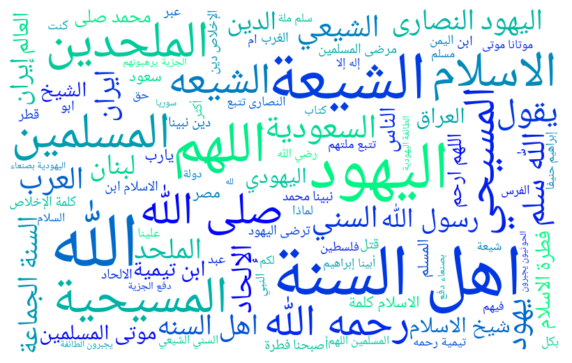

In [212]:
from wordcloud import WordCloud

all_words = ' '.join([text for text in df['tidy_tweet']])

all_words = arabic_reshaper.reshape(all_words)
all_words = get_display(all_words)

wordcloud = WordCloud(font_path='NotoNaskhArabic-Regular.ttf', width=800, height=500, random_state=21,
                      max_font_size=110, background_color = 'white', colormap = 'winter',
                     max_words = 100).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.savefig("filename.png");

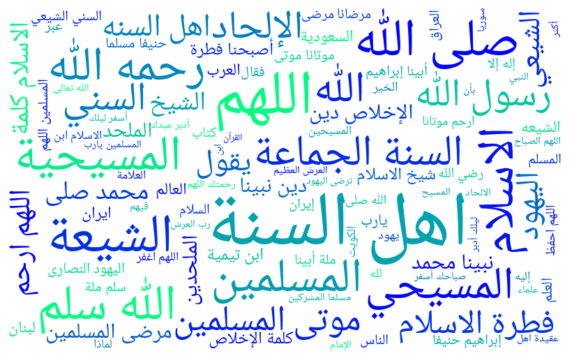

In [213]:
normal_words =' '.join([text for text in df['tidy_tweet'][df['hate'] == 0]])

normal_words = arabic_reshaper.reshape(normal_words)
normal_words = get_display(normal_words)

wordcloud = WordCloud(font_path='NotoNaskhArabic-Regular.ttf', width=800, height=500, random_state=21,
                      max_font_size=110, background_color = 'white', colormap = 'winter',
                     max_words = 100).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.savefig("filename.png");

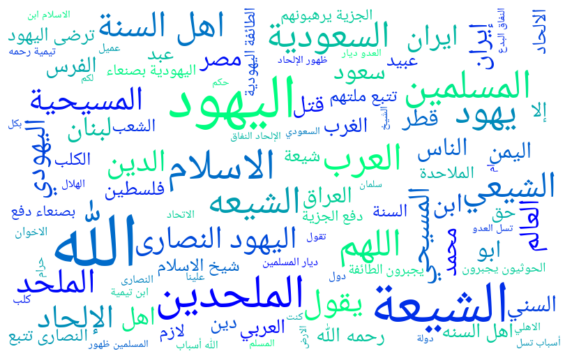

In [214]:
hate_words =' '.join([text for text in df['tidy_tweet'][df['hate'] == 1]])

hate_words = arabic_reshaper.reshape(hate_words)
hate_words = get_display(hate_words)

wordcloud = WordCloud(font_path='NotoNaskhArabic-Regular.ttf', width=800, height=500, random_state=21,
                      max_font_size=110, background_color = 'white', colormap = 'winter',
                     max_words = 100).generate(hate_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.savefig("filename.png");

# Hashtags

In [165]:
HT_regular = df['hashtags'][df['hate'] == 0]
HT_negative = df['hashtags'][df['hate'] == 1]

HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

In [211]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()), 'Count': list(a.values())})

# selecting top 20 most frequent hashtags
d = d.nlargest(columns="Count", n = 20)
ticks = d.Hashtag.tolist()

    
fig = px.bar(x=ticks, y=d['Count'], title='Non-Hateful hashtags', template='plotly_white')
fig.update_layout(
    xaxis = dict(title = 'Hashtags'),
    yaxis = dict(title='Count'),)
fig.show()

In [176]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()), 'Count': list(a.values())})

# selecting top 20 most frequent hashtags
d = d.nlargest(columns="Count", n = 20)
ticks = d.Hashtag.tolist()

    
fig = px.bar(x=ticks, y=d['Count'], title='Hateful hashtags', template='plotly_white')
fig.update_layout(
    xaxis = dict(title = 'Hashtags'),
    xaxis_tickangle=30,
    yaxis = dict(title='Count'),)
fig.show()

In [60]:
df['len_hashtags'] = df.hashtags.apply(lambda x: len(x))
df.isnull().sum()

hate            0
hashtags        0
tidy_tweet      0
len_hashtags    0
dtype: int64

In [107]:
df.drop(['hashtags'], axis = 1, inplace = True)
df.isnull().sum()

hate          0
tidy_tweet    0
dtype: int64

# Word count

In [62]:
df['word_count'] = df['tidy_tweet'].apply(lambda x:len(x.split()))
df.isnull().sum()

hate            0
tidy_tweet      0
len_hashtags    0
word_count      0
dtype: int64

In [63]:
df['unique_word_count'] = df['tidy_tweet'].apply(lambda x:len(set(x.split())))
df.isnull().sum()

hate                 0
tidy_tweet           0
len_hashtags         0
word_count           0
unique_word_count    0
dtype: int64

In [64]:
df['char_count'] = df['tidy_tweet'].apply(lambda x: len([item for item in x]))
df.isnull().sum()

hate                 0
tidy_tweet           0
len_hashtags         0
word_count           0
unique_word_count    0
char_count           0
dtype: int64

In [65]:
df['avg_wordlength'] = df['char_count']/df['word_count']
df.isnull().sum()

hate                 0
tidy_tweet           0
len_hashtags         0
word_count           0
unique_word_count    0
char_count           0
avg_wordlength       1
dtype: int64

In [66]:
df['unique_vs_words'] = df['unique_word_count']/df['word_count']

In [69]:
df.isnull().sum()

hate                 0
tidy_tweet           0
len_hashtags         0
word_count           0
unique_word_count    0
char_count           0
avg_wordlength       0
unique_vs_words      0
dtype: int64

In [68]:
df.dropna(inplace = True)

In [70]:
df.head()

,hate,tidy_tweet,len_hashtags,word_count,unique_word_count,char_count,avg_wordlength,unique_vs_words
0,0,مؤسسة أرشيف المغرب تتسلم ثائق ذاكرة اليهود المغاربة,0,8,8,51,6.375000,1.0
1,0,مفتي السعودية حماس إرهابية قتال اليهود حرام شرعا وزير صهيوني الله إستحوا يفتوا مثلك يعيشك,0,15,15,89,5.933333,1.0
2,1,أمراء سعود اليهود يخوضون حربا الصهيونيه,0,6,6,39,6.500000,1.0
3,0,تحميل كتاب مقارنة الأديان اليهودية تأليف أحمد شلبي pdf مجانا المكتبة الاسلامية موقع بوكس ستريم,0,15,15,94,6.266667,1.0
4,1,هيه الهزه الحقيقيه تخافون الهزه ماتخافون الهزه اعملها نظامكم الهمجي,1,10,8,67,6.700000,0.8


In [1]:
import plotly.express as px

In [71]:
all_words = ' '.join([text for text in df['tidy_tweet']])


x = all_words.split()

a = nltk.FreqDist(x)
d = pd.DataFrame({'words': list(a.keys()), 'Count': list(a.values())})

# selecting top 20 most frequent hashtags
d = d.nlargest(columns="Count", n = 20)
ticks = d.words.tolist()

for i, label in enumerate(ticks):
    ticks[i] = get_display(arabic_reshaper.reshape(label))


fig = px.bar(d[:20], x='words', y='Count', title='Counts of top words', template='plotly_white')
fig.show()

In [72]:
x = all_words.split()

a = nltk.FreqDist(x)
d = pd.DataFrame({'words': list(a.keys()), 'Count': list(a.values())})

# selecting top 20 most frequent words
d = d.nlargest(columns="Count", n = 20)
ticks = d.words.tolist()
df['tidy_tweet'] = df['tidy_tweet'].apply(lambda x: x.split())
df['top_words_count'] = df['tidy_tweet'].apply(lambda x: len([item for item in x if item in ticks]))
df.head()

,hate,tidy_tweet,len_hashtags,word_count,unique_word_count,char_count,avg_wordlength,unique_vs_words,top_words_count
0,0,"[مؤسسة, أرشيف, المغرب, تتسلم, ثائق, ذاكرة, اليهود, المغاربة]",0,8,8,51,6.375000,1.0,1
1,0,"[مفتي, السعودية, حماس, إرهابية, قتال, اليهود, حرام, شرعا, وزير, صهيوني, الله, إستحوا, يفتوا, مثلك, يعيشك]",0,15,15,89,5.933333,1.0,2
2,1,"[أمراء, سعود, اليهود, يخوضون, حربا, الصهيونيه]",0,6,6,39,6.500000,1.0,1
3,0,"[تحميل, كتاب, مقارنة, الأديان, اليهودية, تأليف, أحمد, شلبي, pdf, مجانا, المكتبة, الاسلامية, موقع, بوكس, ستريم]",0,15,15,94,6.266667,1.0,0
4,1,"[هيه, الهزه, الحقيقيه, تخافون, الهزه, ماتخافون, الهزه, اعملها, نظامكم, الهمجي]",1,10,8,67,6.700000,0.8,0


In [74]:
df.top_words_count.value_counts()

1    1346
0    1041
2     755
3     348
4     122
5      89
6      15
8       1
Name: top_words_count, dtype: int64

In [293]:
import plotly.graph_objects as go

d = df.drop(['tidy_tweet', 'word_count', 'unique_word_count', 'len_hashtags',
             'char_count', 'avg_wordlength', 'unique_vs_words'], axis = 1)
d = d.explode('most_used_words_tweet')
d.dropna(inplace = True)
words = d.query("hate == 0").groupby(['most_used_words_tweet']).count().index
words = words.tolist()
no_hate_count = d.query("hate == 0").groupby(['most_used_words_tweet']).count().values
no_hate_count = no_hate_count.tolist()
no_hate_count = sum(no_hate_count,[])
dp = pd.DataFrame({'most_used_words_tweet': words, 'no_hate_count': no_hate_count })
hate_count = d.query("hate == 1").groupby(['most_used_words_tweet']).count().values.tolist()
hate_count = sum(hate_count, [])
dp['hate_count'] = hate_count



fig = go.Figure(data=[
    go.Bar(name='hate', x=words, y= dp['hate_count'], marker_color='crimson'),
    go.Bar(name='no hate', x=words, y= dp['no_hate_count'], marker_color='lightslategrey')
])
# Change the bar mode

fig.update_layout(
    title='Count of Top words by tweet connotation',
    barmode='group',
    template='plotly_white',
    width=1000, height=500)

fig.show()

# Bigrams

In [38]:
from nltk import bigrams

words = all_words.split()
(pd.Series(nltk.ngrams(words, 2)).value_counts())[:10]

(اهل, السنة)         234
(صلى, الله)           89
(رحمه, الله)          88
(الله, سلم)           76
(اليهود, النصارى)     67
(اهل, السنه)          65
(السنة, الجماعة)      60
(رسول, الله)          58
(شيخ, الاسلام)        52
(ابن, تيمية)          48
dtype: int64

In [39]:
d = pd.read_csv('bigrams.csv')

fig = px.bar(d, x='words', y='Count', title='Counts of top bigrams', template='plotly_white')
fig.show()

In [256]:
df.head()

,hate,hashtags,tidy_tweet
0,0,[],مؤسسة أرشيف المغرب تتسلم ثائق ذاكرة اليهود المغاربة
1,0,[],مفتي السعودية حماس إرهابية قتال اليهود حرام شرعا وزير صهيوني الله إستحوا يفتوا مثلك يعيشك
2,1,[],أمراء سعود اليهود يخوضون حربا الصهيونيه
3,0,[],تحميل كتاب مقارنة الأديان اليهودية تأليف أحمد شلبي pdf مجانا المكتبة الاسلامية موقع بوكس ستريم
4,1,[#هزه_ارضيه_في_جده],هزه_ارضيه_في_جده هيه الهزه الحقيقيه تخافون الهزه ماتخافون الهزه اعملها نظامكم الهمجي


In [76]:
df['tidy_tweet'] = df['tidy_tweet'].apply(lambda x: ' '.join([w for w in x]))
df.head()

,hate,tidy_tweet,len_hashtags,word_count,unique_word_count,char_count,avg_wordlength,unique_vs_words,top_words_count
0,0,مؤسسة أرشيف المغرب تتسلم ثائق ذاكرة اليهود المغاربة,0,8,8,51,6.375000,1.0,1
1,0,مفتي السعودية حماس إرهابية قتال اليهود حرام شرعا وزير صهيوني الله إستحوا يفتوا مثلك يعيشك,0,15,15,89,5.933333,1.0,2
2,1,أمراء سعود اليهود يخوضون حربا الصهيونيه,0,6,6,39,6.500000,1.0,1
3,0,تحميل كتاب مقارنة الأديان اليهودية تأليف أحمد شلبي pdf مجانا المكتبة الاسلامية موقع بوكس ستريم,0,15,15,94,6.266667,1.0,0
4,1,هيه الهزه الحقيقيه تخافون الهزه ماتخافون الهزه اعملها نظامكم الهمجي,1,10,8,67,6.700000,0.8,0


# Modelling

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import sklearn
import gensim

In [23]:
from sklearn.feature_selection import SelectPercentile, f_classif, chi2

# TF-IDF Features

In [24]:
tfidf_vectorizer = TfidfVectorizer(
    use_idf=True,
    decode_error='replace',
    min_df=2,
    max_df=0.9,
    sublinear_tf = True
    )

tfidf = tfidf_vectorizer.fit_transform(df['tidy_tweet']).toarray()
tfidf.shape

(3718, 5842)

In [25]:
X_new_tfidf = SelectPercentile(chi2, percentile=30).fit_transform(tfidf, df['hate'])
X_new_tfidf.shape

(3718, 1753)

# Word2Vec Features

In [728]:
tweet = df['tidy_tweet'].apply(lambda x: x.split()) # tokenizing

model_w2v = gensim.models.Word2Vec(
    tweet,
    size= 2000, # desired no. of features/independent variables
    window= 10, # context window size
    min_count=2,
    sg = 1, # 1 for skip-gram model
    hs = 0,
    negative = 10, # for negative sampling
    workers= 2, # no.of cores
    )

model_w2v.train(tweet, total_examples= len(df['tidy_tweet']),epochs=40)

(1293852, 1888680)

In [713]:
model_w2v.wv.most_similar(positive="الله")

[('سول', 0.4071640968322754),
 ('يعبد', 0.4042125940322876),
 ('سلم', 0.3959450423717499),
 ('بش', 0.3932073712348938),
 ('بارولو', 0.39264115691185),
 ('العظيم', 0.382529079914093),
 ('كثرة', 0.3824090361595154),
 ('رحمه', 0.38165631890296936),
 ('يوفقك', 0.3790361285209656),
 ('لسانه', 0.37828099727630615)]

In [701]:
model_w2v.wv.most_similar(positive="اليهود")

[('خلافة', 0.40143346786499023),
 ('يصدر', 0.3879976272583008),
 ('الآخرى', 0.3850931227207184),
 ('الويل', 0.3837926387786865),
 ('معهم', 0.3836638927459717),
 ('يمنع', 0.3831420838832855),
 ('تجربة', 0.37858060002326965),
 ('لنخوض', 0.378314346075058),
 ('اضطرابات', 0.37546539306640625),
 ('التصالح', 0.3748490512371063)]

In [729]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary
            continue
            
    if count != 0:
        vec /= count
    return vec


In [730]:
wordvec_arrays = np.zeros((len(tweet), 2000))
for i in range(len(tweet)):
    wordvec_arrays[i,:] = word_vector(tweet[i], 2000)
    wordvec = pd.DataFrame(wordvec_arrays)
    
wordvec.shape

<ipython-input-729-b5a2a8fd03ce>:6: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



(3718, 2000)

# Models

In [26]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Splitting Data

In [27]:
from sklearn.preprocessing import MaxAbsScaler
transformer = MaxAbsScaler()

## TFIDF

In [28]:
X_new_tfidf = transformer.fit_transform(X_new_tfidf)

In [29]:
# splitting data into training and validation set
xtrain_tfidf, xtest_tfidf, ytrain, ytest = train_test_split(X_new_tfidf, df['hate'], random_state=42, test_size=0.3)

In [30]:
print('training input :', xtrain_tfidf.shape[0])
print('training output :', ytrain.shape[0])
print('testing input :', xtest_tfidf.shape[0])
print('testing output :', ytest.shape[0])

training input : 2602
training output : 2602
testing input : 1116
testing output : 1116


## Word2vec

In [733]:
xtrain_w2v, xvalid_w2v, ytrain, yvalid = train_test_split(wordvec, df['hate'], random_state=42, test_size=0.3)

# Logistic Regression

In [121]:
from sklearn.linear_model import LogisticRegression

## TFIDF

In [811]:
model = LogisticRegression(max_iter = 4000, solver = 'liblinear', penalty = 'l1').fit(xtrain_tfidf, ytrain)

In [812]:
pred = model.predict(xtest_tfidf)

In [813]:
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.76      0.66      0.71       579
           1       0.68      0.77      0.72       537

    accuracy                           0.72      1116
   macro avg       0.72      0.72      0.72      1116
weighted avg       0.72      0.72      0.72      1116



In [786]:
print(confusion_matrix(yvalid, pred))

[[385 194]
 [123 414]]


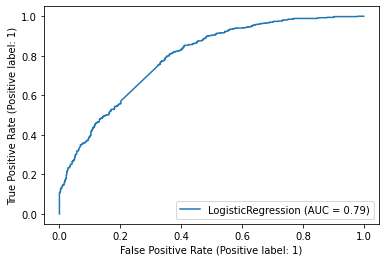

In [787]:
metrics.plot_roc_curve(model, xtest_tfidf, ytest);

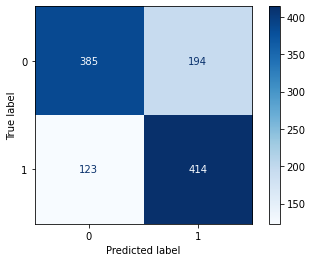

In [788]:
plot_confusion_matrix(model, xtest_tfidf, ytest, cmap = plt.cm.Blues)  
plt.savefig("filename.png");

## Word2Vec

In [789]:
model = LogisticRegression(max_iter = 4000).fit(xtrain_w2v, ytrain)

In [790]:
pred = model.predict(xvalid_w2v)

In [791]:
print(classification_report(yvalid, pred))

              precision    recall  f1-score   support

           0       0.70      0.75      0.73       579
           1       0.71      0.66      0.68       537

    accuracy                           0.71      1116
   macro avg       0.71      0.71      0.71      1116
weighted avg       0.71      0.71      0.71      1116



In [792]:
confusion_matrix(yvalid, pred)

array([[436, 143],
       [184, 353]], dtype=int64)

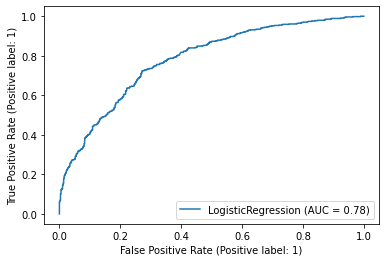

In [793]:
metrics.plot_roc_curve(model, xvalid_w2v, yvalid);

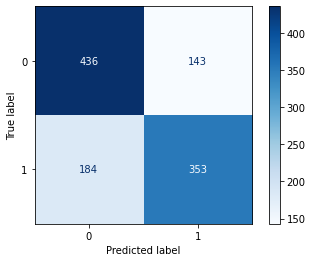

In [794]:
plot_confusion_matrix(model, xvalid_w2v, yvalid, cmap = plt.cm.Blues)  
plt.savefig("filename.png");

# Support Vector Machine (SVM)

In [31]:
from sklearn import svm

## TFIDF

In [32]:
model = svm.SVC(kernel = 'poly').fit(xtrain_tfidf, ytrain)

In [33]:
pred = model.predict(xtest_tfidf)

In [34]:
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.72      0.93      0.81       579
           1       0.89      0.61      0.72       537

    accuracy                           0.78      1116
   macro avg       0.81      0.77      0.77      1116
weighted avg       0.80      0.78      0.77      1116



In [37]:
confusion_matrix(ytest, pred)

array([[540,  39],
       [212, 325]], dtype=int64)

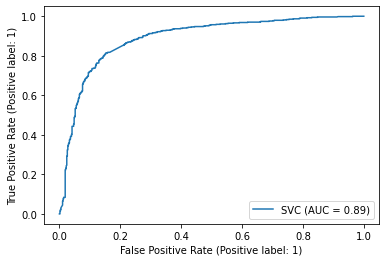

In [38]:
metrics.plot_roc_curve(model, xtest_tfidf, ytest);

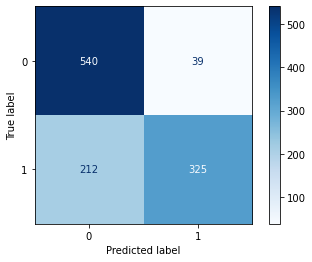

In [39]:
plot_confusion_matrix(model, xtest_tfidf, ytest, cmap = plt.cm.Blues)  
plt.savefig("filename.png");

## Word2vec

In [802]:
model = svm.SVC().fit(xtrain_w2v, ytrain)

In [803]:
pred = model.predict(xvalid_w2v)

In [804]:
print(classification_report(yvalid, pred))

              precision    recall  f1-score   support

           0       0.77      0.74      0.75       579
           1       0.73      0.75      0.74       537

    accuracy                           0.75      1116
   macro avg       0.75      0.75      0.75      1116
weighted avg       0.75      0.75      0.75      1116



In [805]:
confusion_matrix(yvalid, pred)

array([[431, 148],
       [132, 405]], dtype=int64)

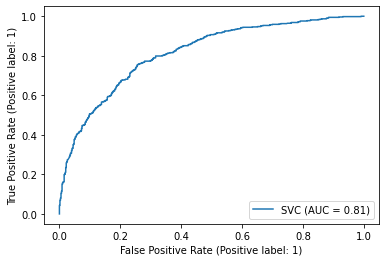

In [806]:
metrics.plot_roc_curve(model, xvalid_w2v, yvalid);

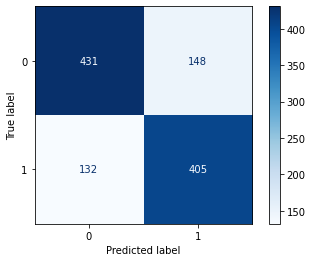

In [807]:
plot_confusion_matrix(model, xvalid_w2v, yvalid, cmap = plt.cm.Blues)  
plt.savefig("filename.png");

# Results

|  | Logistic Regression |SVM       
|:--------:|  :-----------:  |  :-----------:  |
| TF-IDF   | 0.72        | 0.78        |
| Word2Vec | 0.71       |0.75        |

# Finetuning SVM + TFIDF

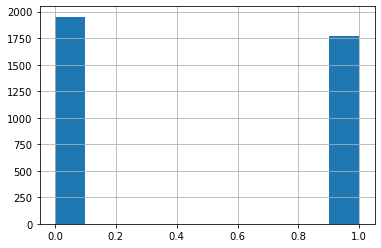

In [571]:
df['hate'].hist();

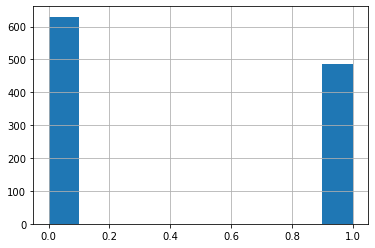

In [573]:
model = svm.SVC().fit(xtrain_tfidf, ytrain)
pred = model.predict(xtest_tfidf)

pd.Series(pred).hist();

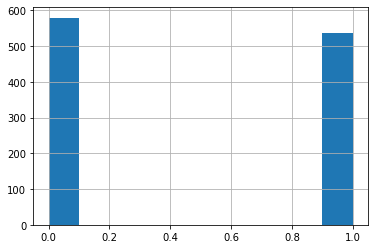

In [574]:
pd.Series(ytest).hist();

Text(0.5, 1.0, 'sample real values')

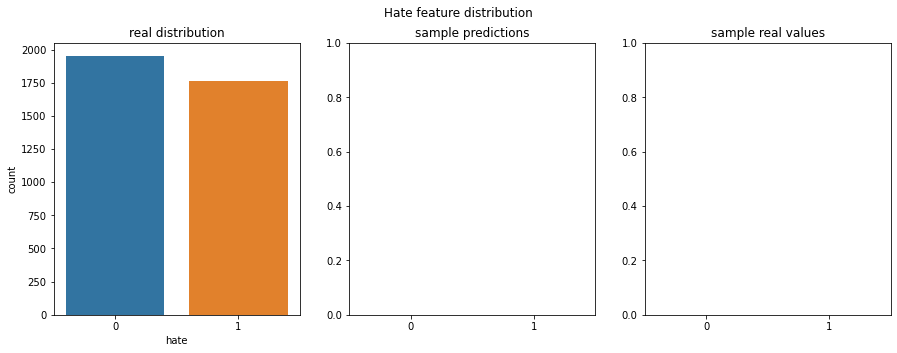

In [43]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True)
fig.suptitle('Hate feature distribution')

sns.countplot(ax=axes[0], x=df.hate)
axes[0].set_title('real distribution')

model = svm.SVC(C = 1, gamma = 0.3, kernel = 'rbf').fit(xtrain_tfidf, ytrain)
pred = model.predict(xtest_tfidf)

sns.countplot(ax=axes[0], x=pred)
axes[1].set_title('sample predictions')

sns.countplot(ax=axes[0], x=ytest)
axes[2].set_title('sample real values')



In [55]:
data = np.concatenate((real,test, predictions), axis=0)

In [114]:
real = df.hate.to_numpy()
test = ytest.to_numpy()
predictions = pred

In [76]:
daf = pd.DataFrame(data, columns=['Hate'])

In [77]:
daf.shape

(5950, 1)

In [62]:
real_f.shap

(3718,)

In [63]:
real_f = np.full(3718, 'all data')
test_f = np.full(1116, 'test sample')
pred_f = np.full(1116, 'predictions')

In [64]:
data_f = np.concatenate((real_f,test_f, pred_f), axis=0)

In [78]:
daf['data'] = data_f

In [79]:
daf['Hate'].value_counts()

0    3163
1    2787
Name: Hate, dtype: int64

In [111]:
daf

,Hate,data
0,0,all data
1,0,all data
2,1,all data
3,0,all data
4,1,all data
...,...,...
5945,1,predictions
5946,0,predictions
5947,0,predictions
5948,1,predictions


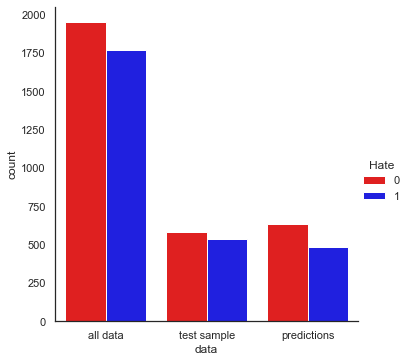

In [131]:
sns.catplot(x="data", hue="Hate", kind="count",
            palette= sns.set_palette(["Red", "blue"]),
            data=daf)

plt.savefig("filename.png");

In [ ]:
plt.savefig("filename.png");

In [ ]:
color = ["Red", "Yellow"]
sns.set_palette(["Red", "Yellow"])
sns.palplot(sns.color_palette())

In [575]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

In [576]:
from sklearn.model_selection import validation_curve

In [815]:
param_range = [0, 0.1, 0.2, 0.3]

train_scores, valid_scores = validation_curve(svm.SVC(), xtrain_tfidf, ytrain, param_name="gamma",
                                              param_range= param_range, scoring="accuracy")

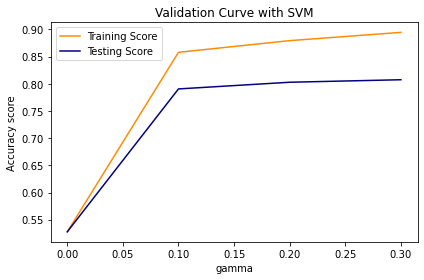

In [816]:
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(valid_scores, axis=1)

# Plot mean accuracy scores for training and testing scores

plt.plot(param_range, train_scores_mean,
     label = "Training Score", color = 'darkorange')
plt.plot(param_range, test_scores_mean,
   label = "Testing Score", color = 'navy')
 
# Creating the plot
plt.title("Validation Curve with SVM")
plt.xlabel('gamma')
plt.ylabel("Accuracy score")
plt.tight_layout()
plt.legend(loc = 'best')
plt.savefig("filenamegamma.png");

In [817]:
param_range= [0.1,1, 10]

train_scores, valid_scores = validation_curve(svm.SVC(gamma = 0.3), xtrain_tfidf, ytrain, param_name="C", param_range= param_range,
                                              scoring="accuracy")

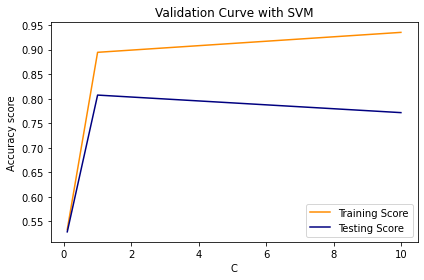

In [818]:
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(valid_scores, axis=1)

# Plot mean accuracy scores for training and testing scores

plt.plot(param_range, train_scores_mean,
     label = "Training Score", color = 'darkorange')
plt.plot(param_range, test_scores_mean,
   label = "Testing Score", color = 'navy')
 
# Creating the plot
plt.title("Validation Curve with SVM")
plt.xlabel('C')
plt.ylabel("Accuracy score")
plt.tight_layout()
plt.legend(loc = 'best')
plt.savefig("filename.png");

In [819]:
param_range = ['linear', 'poly', 'rbf', 'sigmoid']

train_scores, valid_scores = validation_curve(svm.SVC(gamma = 0.3, C = 1), xtrain_tfidf, ytrain, param_name="kernel",
                                              param_range= param_range, scoring="accuracy")

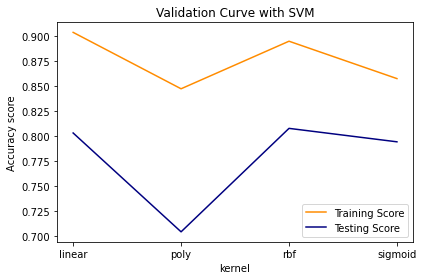

In [820]:
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(valid_scores, axis=1)

# Plot mean accuracy scores for training and testing scores

plt.plot(param_range, train_scores_mean,
     label = "Training Score", color = 'darkorange')
plt.plot(param_range, test_scores_mean,
   label = "Testing Score", color = 'navy')
 
# Creating the plot
plt.title("Validation Curve with SVM")
plt.xlabel('kernel')
plt.ylabel("Accuracy score")
plt.tight_layout()
plt.legend(loc = 'best')
plt.savefig("filename.png");

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       579
           1       0.84      0.76      0.80       537

    accuracy                           0.81      1116
   macro avg       0.82      0.81      0.81      1116
weighted avg       0.81      0.81      0.81      1116

[[501  78]
 [131 406]]


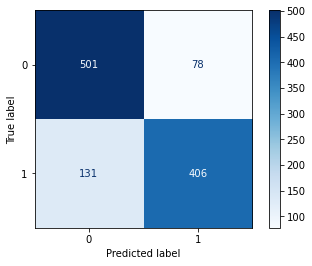

In [41]:
model = svm.SVC(C = 1, gamma = 0.3, kernel = 'rbf' ).fit(xtrain_tfidf, ytrain)
pred = model.predict(xtest_tfidf)
print(classification_report(ytest, pred))
print(confusion_matrix(ytest, pred))
plot_confusion_matrix(model, xtest_tfidf, ytest, cmap = plt.cm.Blues)  
plt.savefig("file.png");

# Fine tune logistic regression + TF-IDF

## Validation curve

In [628]:
param_range = [0.001, 0.05, 0.1, 0.5, 1.0, 10.0, 15.0]
train_scores, test_scores = validation_curve( LogisticRegression(max_iter = 4000), xtrain_tfidf, ytrain, param_name='C', 
                                              param_range=param_range, scoring="accuracy")

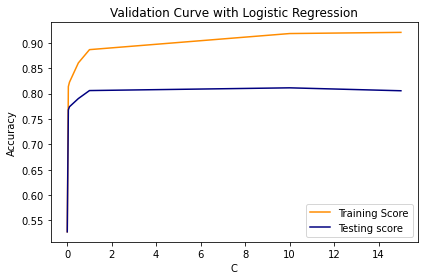

In [629]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
#
# Plot the model scores (accuracy) against the paramater range
#
plt.plot(param_range, train_mean,
         label = "Training Score", color = 'darkorange')
plt.plot(param_range, test_mean,
         color='navy', label='Testing score')

plt.title("Validation Curve with Logistic Regression")
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

In [632]:
param_range = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

train_scores, test_scores = validation_curve( LogisticRegression(max_iter = 1000, C = 10), xtrain_tfidf, ytrain, param_name='solver', 
                                              param_range= param_range, scoring="accuracy")

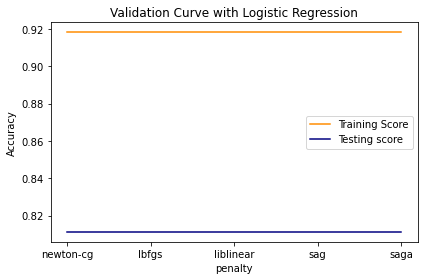

In [633]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
#
# Plot the model scores (accuracy) against the paramater range
#
plt.plot(param_range, train_mean,
         label = "Training Score", color = 'darkorange')
plt.plot(param_range, test_mean,
         color='navy', label='Testing score')

plt.title("Validation Curve with Logistic Regression")
plt.xlabel('penalty')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

In [696]:
param_range = ['l1', 'l2']

train_scores, test_scores = validation_curve( LogisticRegression(max_iter = 4000, solver = 'liblinear'), xtrain_tfidf, ytrain, param_name='penalty', 
                                              param_range= param_range, scoring="accuracy")

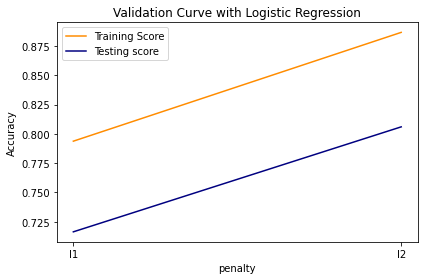

In [697]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
#
# Plot the model scores (accuracy) against the paramater range
#
plt.plot(param_range, train_mean,
         label = "Training Score", color = 'darkorange')
plt.plot(param_range, test_mean,
         color='navy', label='Testing score')

plt.title("Validation Curve with Logistic Regression")
plt.xlabel('penalty')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       579
           1       0.84      0.76      0.80       537

    accuracy                           0.81      1116
   macro avg       0.82      0.81      0.81      1116
weighted avg       0.82      0.81      0.81      1116

[[499  80]
 [127 410]]


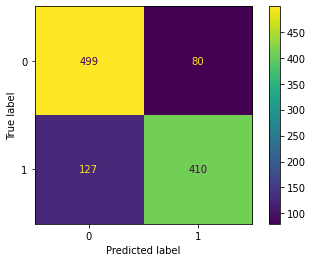

In [672]:
model = LogisticRegression(penalty = 'l2', solver = 'liblinear', C = 10, max_iter = 4000).fit(xtrain_tfidf, ytrain)
pred = model.predict(xtest_tfidf)
print(classification_report(ytest, pred))
print(confusion_matrix(yvalid, pred))
plot_confusion_matrix(model, xtest_tfidf, ytest)  
plt.show() 